# Lab One: Exploring Table or Text Data
## Option 1: Table Data

Machine Learning in Python
<br><br>
Will Lacey - 45906124 - CSE7324
<br>
Roger Wong - 43867412 - CSE5324

## Business Understanding (15 points total).  
<em>
[<strong>15 points</strong>] In your own words, give an overview of the dataset. Describe the purpose of the data set you selected (i.e., why and how was this data collected in the first place?). What is the prediction task for your data and why are other third parties interested in the result? Once you begin modeling, how well would your prediction algorithm need to perform to be considered useful to these third parties?
<br><br>
Be specific and use your own words to describe the aspects of the data.
</em>

#### Overview and Purpose
This data can be used to identify what factors lead to underage alcohol consumption during the weekday and weekend.

Dataset description: “The data was obtained in a student survey in both Portuguese language and Math courses in secondary school. It contains a lot of interesting social, gender, and study information about students. You can use it for some EDA or try to predict student’s susceptibility to alcohol.” Collected in 2008.

This dataset has more than 1000 students and 34 features that includes both categorical and numerical data. We will find which features most significantly correlates with student alcohol consumption using data visualization methods. 

According to https://www.cnn.com/2017/05/11/health/high-school-drinking-rates-cdc/index.html, there has been a steep increase in underage binge drinking as students go from their first year to their last year of high school going from 47% to 61.9%. With such a high increase, schools are stumped on how to provide support to their students.

With this data set, we can create policy or measures where third parties such as schools, parents, and health care providers can identify which type of students need the most help. They will be able to keep track of the wellness of their students. It is highly unlikely for schools to focus on every single student in order to provide help so instead schools should predict which students need to be focused on more. 



#### Measure of Success

To yield the most significant result with this dataset, we need to be able to more aptly determine which students may or may not be at risk of mental health disorders or abuse of illegal substences. While the legal drinking age of Portugal is 16, we still intend to find correlation to young alcohol abuse and other factors. Although it may be possible that in viewing this dataset, there is no suggested measure to determine any pattern or outlier in a student population, it will be equally beneficial to observe areas in which there are no correlation to mental health dilemmas. 

However, despite a small sample size of only 1044 students relative to a large amount of 34 different features, we still aim to uncover correlations in the sample.

#### Import Modules and Initialization

Before we begin, let's import essential packages for data analysis

In [1]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings
import missingno
from IPython.display import display_html
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import StandardScaler
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.manifold import TSNE

warnings.filterwarnings("ignore")


def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
warnings.simplefilter('ignore', DeprecationWarning)

%matplotlib inline

## Data Understanding (30 points total)
<em>
[<strong>15 points</strong>] Load the dataset and appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.  
</em>

#### Load Student Alcohol Consumption Dataset

Next, let's read in the Kaggle dataset on <strong><em>Student Alcohol Consumption</em></strong> through two csv files, <strong><em>student-mat.csv</em></strong> and <strong><em>student-por.csv</em></strong>

In [2]:
try:
    df_mat = pd.read_csv('student-mat.csv') # read in the csv file
    df_por = pd.read_csv('student-por.csv') # read in the csv file
    df_mat['class'] = "math"
    df_por['class'] = "portuguese"
    df = pd.concat([df_mat, df_por], ignore_index=True)
    print("Succeeded to Open File.\n")
    df.romantic.replace(to_replace=['yes','no'], value=(0,1),inplace=True)
    print(df.info()) 
    
except IOError:
    print("Failed to Open Files. Quitting Program.")
    sys.exit

Succeeded to Open File.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null int64
famrel        1044 non-null int64
freetime      1044 non-null int64
go

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


#### Student Alcohol Consumption Dataset
The Student Alcohol Consumption dataset is a 111 KB repository, which as mentioned before, is comprised of 34 attributes, including a summation of 1044 students. While an exhaustive list of the data members can be viewed in the next cell, the particular variables we aim to focus on are the following:

    Sex     (object)  - Male or Female represented by either 'M' or 'F'. No other option for gender.

    Age   (int) - Age of high school student ranging from 15 to 22.

    Dalc   (int)  - Weekday level of alcohol consumption rated by student from 1 (very low) to 5 (very high).

    Walc (int)  - Weekend level of alcohol consumption rated by student from 1 (very low) to 5 (very high).

    G1, G2, G3  (int)  - Period 1, 2, and 3 Grades respectively ranging from 0 to 19.

These variables are areas we decided to particularly view and hone in on. While the dataset does have a lot of variables, we decided to keep and test all of them in the event of a surpising discovery or correlation hidden among them. 

Additional information about other dataset features:
<h6>      
    <strong>School (object)</strong>  - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
    <br><br>
    <strong>Sex (object)</strong> - Male or Female represented by either 'M' or 'F'. No other option for gender.
    <br><br>
    <strong>age (int)</strong> - student's age (numeric: from 15 to 22)
    <br><br>
    <strong>address (object)</strong> - student's home address type (binary: 'U' - urban or 'R' - rural)
       <br><br> 
    <strong>Pstatus (object)</strong> - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    <br><br>
    <strong>Medu (int)</strong> - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th         grade, 3 – secondary education or 4 – higher education)
    <br><br>
    <strong>Fedu (int)</strong> - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th         grade, 3 – secondary education or 4 – higher education)
    <br><br>
    <strong>Mjob (object)</strong> - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or       police), 'at_home' or 'other')
    <br><br>
    <strong>Fjob (object)</strong> - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or       police), 'at_home' or 'other')
    <br><br>
    <strong>reason (object)</strong> - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference     or 'other')
    <br><br>
    <strong>failures (int)</strong> - number of past class failures (numeric: n if 1<=n<3, else 4)
    <br><br>
    <strong>nursery (int)</strong> - attended nursery school (binary: yes or no)
    <br><br>
    <strong>higher (object)</strong>- wants to take higher education (binary: yes or no)
    <br><br>
    <strong>internet (object)</strong> - Internet access at home (binary: yes or no)
    <br><br>
    <strong>romantic (object)</strong> - with a romantic relationship (binary: yes or no)
    <br><br>
    <strong>famrel (object)</strong> - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    <br><br>
    <strong>freetime (int)</strong> - free time after school (numeric: from 1 - very low to 5 - very high)
    <br><br>
    <strong>goout (int)</strong> - going out with friends (numeric: from 1 - very low to 5 - very high)
    <br><br>
    <strong>Dalc (int)</strong> - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    <br><br>
    <strong>Walc (int)</strong> - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    <br><br>
    <strong>absences (int)</strong> - number of school absences (numeric: from 0 to 93)
    <br><br>
    <strong>G1 (int)</strong> - first period grade (numeric: from 0 to 20)
    <br><br>
    <strong>G2 (int)</strong> - second period grade (numeric: from 0 to 20)
    <br><br>
    <strong>G3 (int)</strong> - final grade (numeric: from 0 to 20, output target)
    <br><br>
    <strong>class (object)</strong> - class sampled from (nominal: 'portuguese' or 'math')
    
</h6>  

<em>
[<strong>15 points</strong>] Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).
</em>

## Data Quality
Using missingno to observe any missing data.

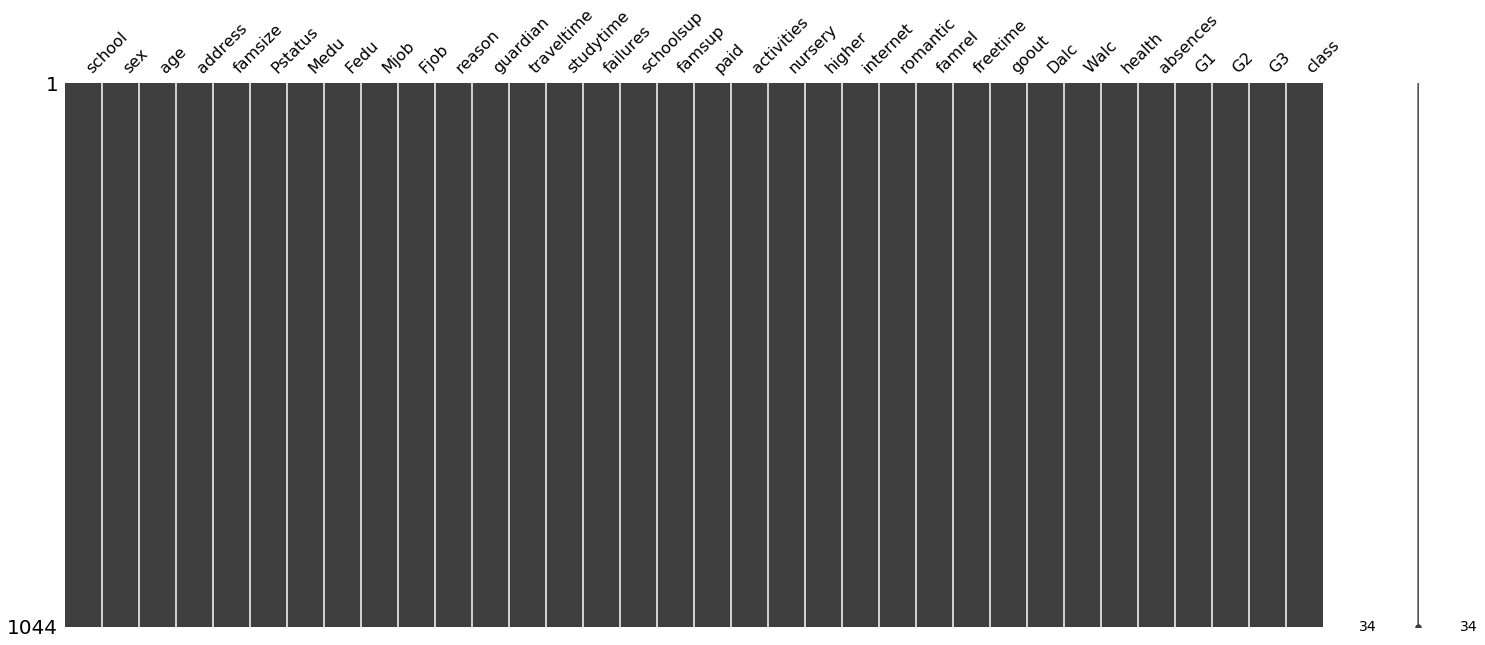

In [4]:
missingno.matrix(df)

#### Awesome! No missing data!

Super simple. No errors here. Now time to see if there are any duplicates 

In [5]:
idx = df.duplicated()
len(df[idx])

0

As shown above, there are no duplicates. This makes sense in regards to out of 1044 students with 34 measured variables it is unlikely that two students would have answered identically unless there was collaboration. However, in the event that there was a duplicate entry, the appropriate response would to be to leave it in the dataset. Given that each entry represents an individual student's response, there is no reason to remove such an entry, despite its unlikeliness. 

Before continuing, let's create a second dataframe in which all categorical data is represented as a numeric value, either through a One Hot Encoding or Binary Encoding. This will be convenient later on when implementing a correlation matrix, t-SNE, or even in other relationships.

In [6]:
def one_hot_encode(df, feature):
    one_hot = pd.get_dummies(df[feature], prefix = feature)
    df = df.drop([feature], axis=1)
    df = pd.concat([df, one_hot], axis=1)
    return df

def binary_encode(df, feature):
    binary = pd.get_dummies(df[feature], prefix = feature)
    df = df.drop([feature], axis=1)
    df = pd.concat([df, binary.iloc[:,0]], axis=1)
    return df

df_numeric = df.copy()

df_numeric = one_hot_encode(df_numeric, 'Mjob')
df_numeric = one_hot_encode(df_numeric, 'Fjob')
df_numeric = one_hot_encode(df_numeric, 'guardian')
df_numeric = one_hot_encode(df_numeric, 'reason')

df_numeric = binary_encode(df_numeric, 'sex')
df_numeric = binary_encode(df_numeric, 'Pstatus')
df_numeric = binary_encode(df_numeric, 'class')
df_numeric = binary_encode(df_numeric, 'school')
df_numeric = binary_encode(df_numeric, 'paid')
df_numeric = binary_encode(df_numeric, 'nursery')
df_numeric = binary_encode(df_numeric, 'activities')
df_numeric = binary_encode(df_numeric, 'higher')
df_numeric = binary_encode(df_numeric, 'internet')
df_numeric = binary_encode(df_numeric, 'address')
df_numeric = binary_encode(df_numeric, 'famsize')
df_numeric = binary_encode(df_numeric, 'schoolsup')
df_numeric = binary_encode(df_numeric, 'famsup')


In [7]:
df_numeric.describe()

,age,Medu,Fedu,traveltime,studytime,failures,romantic,famrel,freetime,goout,...,school_GP,paid_no,nursery_no,activities_no,higher_no,internet_no,address_R,famsize_GT3,schoolsup_no,famsup_no
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,0.644636,3.935824,3.201149,3.156130,...,0.739464,0.789272,0.200192,0.505747,0.085249,0.207854,0.272989,0.706897,0.886015,0.386973
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.478853,0.933401,1.031507,1.152575,...,0.439138,0.408021,0.400335,0.500207,0.279386,0.405967,0.445708,0.455404,0.317945,0.487291
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,3.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,1.000000,4.000000,3.000000,3.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,1.000000,5.000000,4.000000,4.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The average age of our high schooler is 16.7 years old. This seems perfectly reasonable since our high schooler generally ranges from 15 to 18 years of age. In addition, some interesting observations can be made right off the bat. Most people who were observed were in a romantic relationship yielding a 64.4% likeliness. Our average high schooler tends to get along with their family with a 3.9 out of 5 score. And over 90% of students want to achieve higher education while less than 15% of them actually seek additional school support after class. 

## Data Visualization (45 points total)
<em>
[<strong>20 points</strong>] Visualize attribute distributions. Choose and visualize distributions for a subset of single attributes. Choose any appropriate visualization such as histograms, kernel density estimation, box plots, etc. Describe anything meaningful or potentially interesting you discover from these visualizations. Note: You can also use data from other sources to bolster visualizations. Visualize at least 5 attributes, at least one categorical and at least one numeric.
</em>

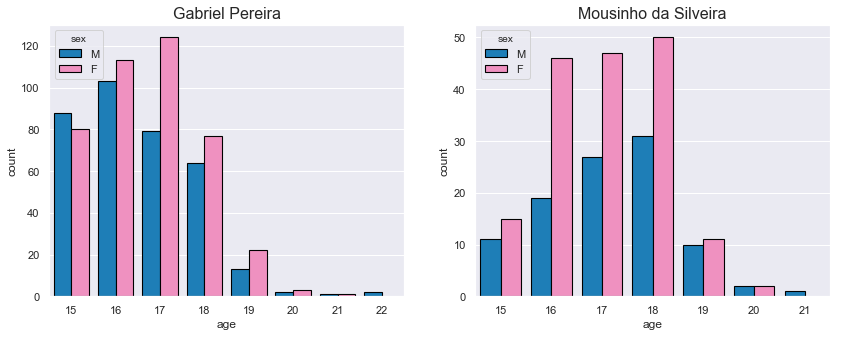

In [8]:
# Histogram of Age and Sex for Gabriel Pereira and Mousinho da Silveira Secondary Schools

sns.set(style='darkgrid')
hue_order = ['M','F']
palette = ['#0485d1', '#ff81c0']

plt.subplots(figsize=(14,5))

plt.subplot(1,2,1)
ax = sns.countplot(x='age', hue='sex', hue_order=hue_order, 
                   data=df[df.school == 'GP'], palette=palette, edgecolor='#000000', linewidth=1.1)
ax.set_title('Gabriel Pereira', fontsize=16)

plt.subplot(1,2,2)
ax = sns.countplot(x='age', hue='sex', hue_order=hue_order, 
                   data=df[df.school == 'MS'], palette=palette, edgecolor='#000000', linewidth=1.1)
ax.set_title('Mousinho da Silveira', fontsize=16)

plt.show()

This joint histogram shows the total number of boys and girls, and their respective ages, attending the secondary schools Gabriel Pereira and Mousinho da Silveira. One may attend either of these schools if they were to live in Portugal where the establishments reside.

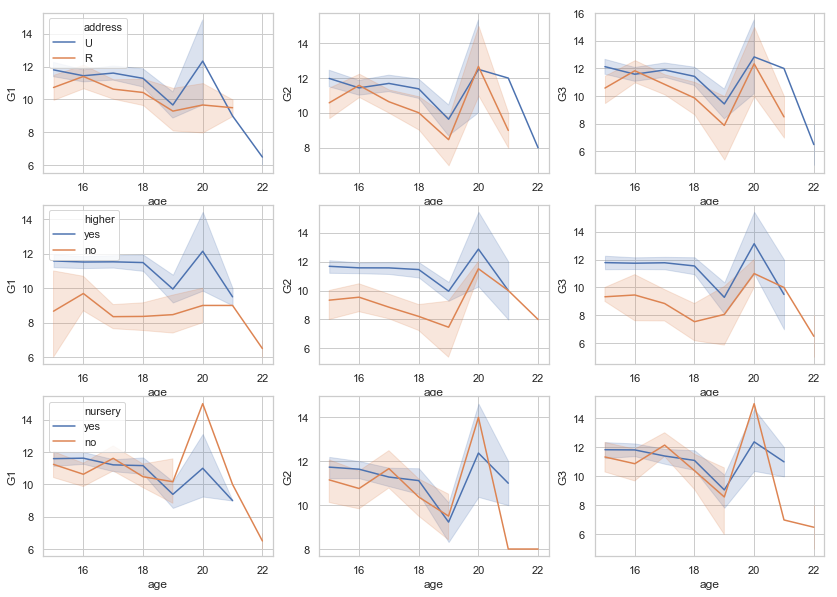

In [9]:
sns.set(style="whitegrid")
plt.subplots(figsize=(14,10))

plt.subplot(3,3,1)
ax = sns.lineplot(x='age', y='G1', hue='address', data=df)
plt.subplot(3,3,2)
ax = sns.lineplot(x='age', y='G2', hue='address', data=df, legend=False)
plt.subplot(3,3,3)
ax = sns.lineplot(x='age', y='G3', hue='address', data=df, legend=False)

plt.subplot(3,3,4)
ax = sns.lineplot(x='age', y='G1', hue='higher', data=df)
plt.subplot(3,3,5)
ax = sns.lineplot(x='age', y='G2', hue='higher', data=df, legend=False)
plt.subplot(3,3,6)
ax = sns.lineplot(x='age', y='G3', hue='higher', data=df, legend=False)

plt.subplot(3,3,7)
ax = sns.lineplot(x='age', y='G1', hue='nursery', data=df)
plt.subplot(3,3,8)
ax = sns.lineplot(x='age', y='G2', hue='nursery', data=df, legend=False)
plt.subplot(3,3,9)
ax = sns.lineplot(x='age', y='G3', hue='nursery', data=df, legend=False)


plt.show()

Before turning our focus on student alcohol consumption, the previous graphs display a little more information about our school goers and their grades. Seen above, it can be suggested that students who live in an urban environment or students who have ambitions for a higher education do better academically then their classmates who do not. However, despite what studies suggest, it cannot be indicated that students who attended nursery/preschool are better off then their classmates. Nonetheless, a reminder is that this dataset is only a collection of 1044 students from only two locations. As a result, studies else where might provide adverse information. Regardless, it makes the most sense that students who wish to pursue a higher education, would make the highest grades. We all have to do our best if we want to get accepted into college somewhere.

In [10]:
print('Daily Alcohol Content')
df_dalc = df.groupby(by='Dalc')
for dalc,grp in df_dalc:
    print('There are {} people with this amount of daily alcohol content: {}'.format(len(grp),dalc))

print('========================================================')

print('Weekend Alcohol Content')
df_walc = df.groupby(by='Walc')
for dalc,grp in df_walc:
    print('There are {} people with this amount of weekend alcohol content: {}'.format(len(grp),dalc))

print('========================================================')
print('========================================================')
#print(df_dalc.sum() / df_dalc.count())



Daily Alcohol Content
There are 727 people with this amount of daily alcohol content: 1
There are 196 people with this amount of daily alcohol content: 2
There are 69 people with this amount of daily alcohol content: 3
There are 26 people with this amount of daily alcohol content: 4
There are 26 people with this amount of daily alcohol content: 5
Weekend Alcohol Content
There are 398 people with this amount of weekend alcohol content: 1
There are 235 people with this amount of weekend alcohol content: 2
There are 200 people with this amount of weekend alcohol content: 3
There are 138 people with this amount of weekend alcohol content: 4
There are 73 people with this amount of weekend alcohol content: 5


The graph below visualizes the data gathered from above. Most students drink little to no alcohol. Despite this, on average a student is likely to have a few drinks during the weekend.

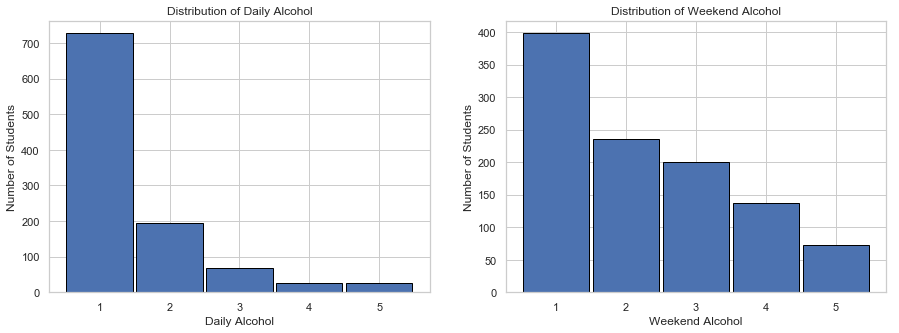

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,2)
plt.hist(df.Walc, bins=range(1,7), rwidth=0.95, align='left', edgecolor = 'black')
plt.xlabel('Weekend Alcohol')
plt.ylabel('Number of Students')
plt.title('Distribution of Weekend Alcohol')

plt.subplot(1,2,1)
plt.hist(df.Dalc, bins=range(1,7), rwidth=0.95, align='left', edgecolor = 'black')
plt.xlabel('Daily Alcohol')
plt.ylabel('Number of Students')
plt.title('Distribution of Daily Alcohol')
plt.show()

Again, as you can see above, a majority of the students prefer drinking on the weekend then during the weekday. Students with a Dalc of 1 are more distributed in the Walc chart. Many reasons for this include them having to go to school, working jobs, or participating in extraciricular activity.

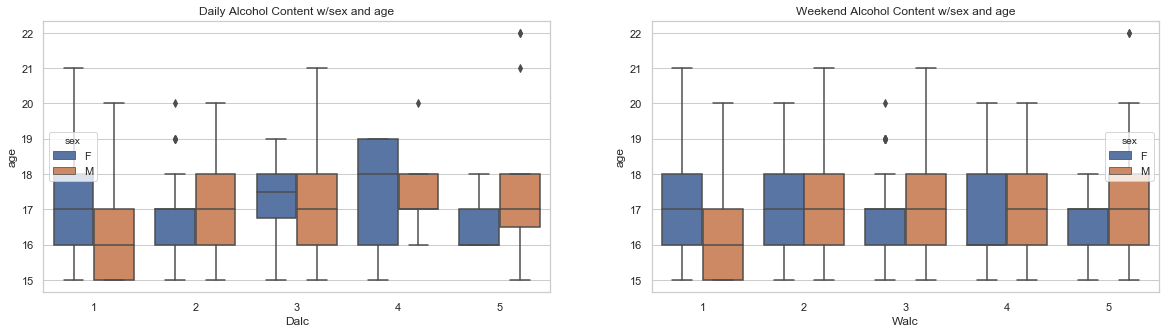

In [12]:
plt.subplots(figsize=(20, 5))

plt.subplot(1,2,1)
sns.boxplot(x="Dalc", y="age", hue="sex", data=df)
plt.title('Daily Alcohol Content w/sex and age')

plt.subplot(1,2,2)
sns.boxplot(x="Walc", y="age", hue="sex", data=df)
plt.title('Weekend Alcohol Content w/sex and age')

plt.show()

The two graphs above show the distribution of ages for each Dalc and Walc category. They are then seperated by sex. In the Dalc graph, we can see that the oldest males have a high daily alcohol intake while the oldest females don't have a really high daily alcohol intake. Surprisingly, a wide age range of females have a Dalc of 4. 
In the Walc graph, there is a more even age ratio of male to female drinking with males exceeeding more in the higher weekend alcohol intake.   

Students with Parents who are Apart: 121
Students with Parents who are Together: 923


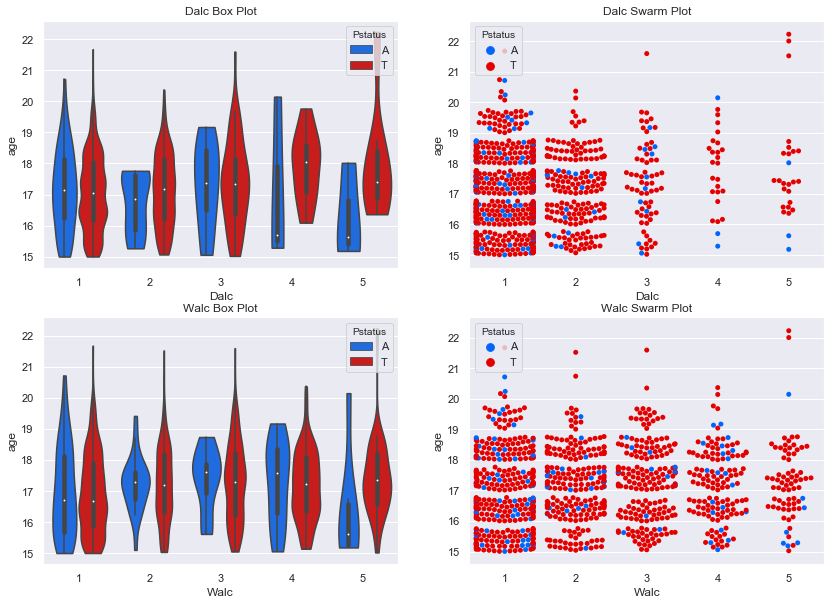

In [13]:
print('Students with Parents who are Apart: ' + str(len(df[df.Pstatus == "A"])))
print('Students with Parents who are Together: ' + str(len(df[df.Pstatus == "T"])))

df_jitter = df.copy()
df_jitter['age'] += np.random.rand(len(df_jitter))/1.3

plt.subplots(figsize=(14,10))
sns.set(style='darkgrid')
hue_order = ['T','A']
palette = ['#0165fc', '#e50000']

plt.subplot(2,2,1)
sns.violinplot(x="Dalc", y="age", hue="Pstatus", data=df_jitter, palette=palette, cut=0, bw="scott")
plt.title('Dalc Box Plot')

plt.subplot(2,2,2)
sns.swarmplot(x="Dalc", y="age", hue="Pstatus", data=df_jitter, palette=palette)
plt.title('Dalc Swarm Plot')

plt.subplot(2,2,3)
sns.violinplot(x="Walc", y="age", hue="Pstatus", data=df_jitter, palette=palette, cut=0, bw="scott")
plt.title('Walc Box Plot')

plt.subplot(2,2,4)
sns.swarmplot(x="Walc", y="age", hue="Pstatus", data=df_jitter, palette=palette)
plt.title('Walc Swarm Plot')

plt.show()

These depicted graphs show alcoholic intake relative to the marriage status of their parents. While at first it can be suggested in the Violin plots that students who have parents who are together drink slightly more, it is then observed in the Swarm plots as well as the Python code above that the instances of students who have separated parents are significantly fewer. Overall, it appears that there is no correlation between parents marriage status and alcohol consumption. 

<em>
[<strong>25 points</strong>]  Visualize relationships between a subset of attributes. Use whichever visualization method is appropriate for your data. Explain any interesting relationships. Important: Interpret the implications for each visualization. Visualize at least three subsets of the attributes. 
</em>

The chart above shows how many people have a romantic relationship in each alcohol intake category for Dalc and Walc. 

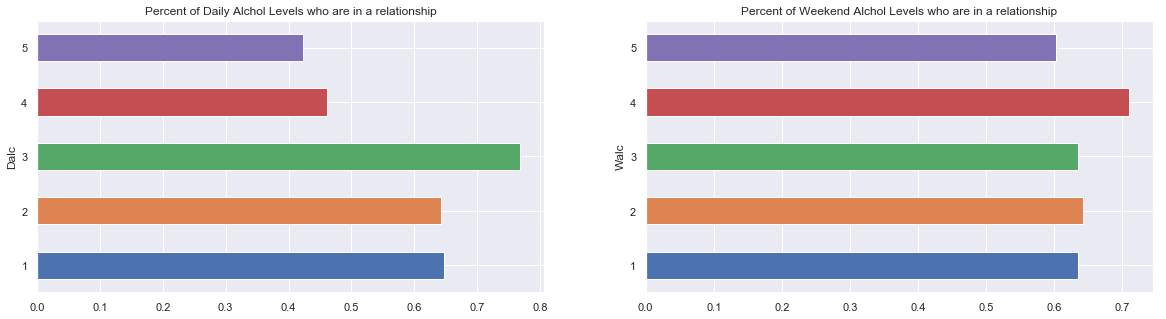

In [14]:
plt.subplots(figsize=(20, 5))
romantic_dalc = pd.crosstab([df['Dalc']],df.romantic.astype(bool))
romantic_walc = pd.crosstab([df['Walc']],df.romantic.astype(bool))
plt.subplot(1,2,1)
romantic_rate = df_dalc.romantic.sum() / df_dalc.romantic.count()
ax = romantic_rate.plot(kind='barh')
plt.title('Percent of Daily Alchol Levels who are in a relationship')

plt.subplot(1,2,2)
romantic_rate2 = df_walc.romantic.sum() / df_walc.romantic.count()
ax = romantic_rate2.plot(kind='barh')
plt.title('Percent of Weekend Alchol Levels who are in a relationship')

plt.show()

<p>The graph above shows the percentage of people in a relationship in each alcohol intake category. As we can see, less than half the students with a 4 or higher dalc are in a relationship while inversely more than half the students with a 4 or higher walc are in a relationship. For the Dalc chart, a majority of students with low dalc are in a relationship. </p>
In summary, students with a lower dalc mostly have relationships while students with a higher walc mostly have relationships.

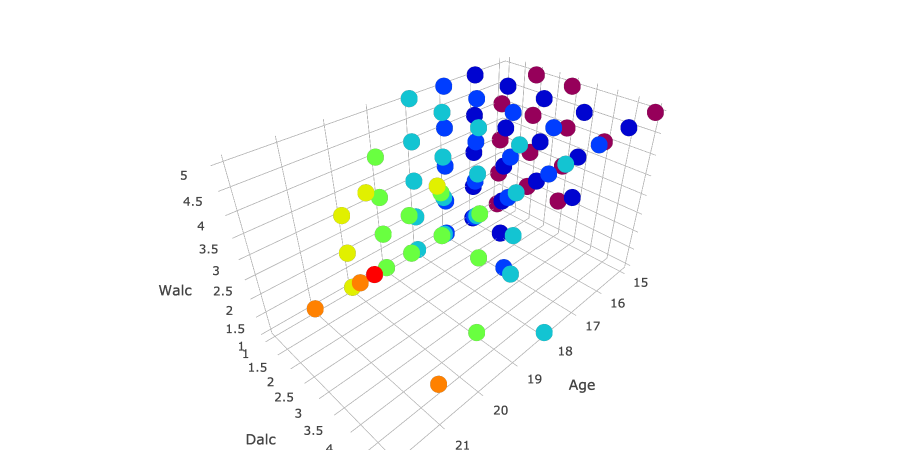

In [15]:
trace = go.Scatter3d(
    x = df.age,
    y = df.Dalc,
    z = df.Walc,
    mode = 'markers',
    marker = dict(
        size = 10,
        color = df.age,
        colorscale = 'Rainbow'
    )
)
dataTrace = [trace]
layoutTrace = go.Layout(
     margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
    xaxis = dict(
        title='Age'),
    yaxis = dict(
        title='Dalc'),
    zaxis = dict(
        title='Walc'),),
)
figTrace = go.Figure(data=dataTrace, layout=layoutTrace)
iplot(figTrace)

<p>The X-axis represents Age</p>
<p>The Y-axis represents Dalc</p>
<p>The Z-axis represents Walc</p>
<p>As you move the scatter plot around, we can see Dalc and Walc are congregated together. It looks like the distribution of Dalc and Walc is the same between the ages 15-18. In focusing on students who are 15 years old, we find that they are less likely to drink than their peers. This is most likely due to the legal drinking age of Portugal being 16. </p>

Text(0.5, 1.0, 'Correlation Matrix Graph')

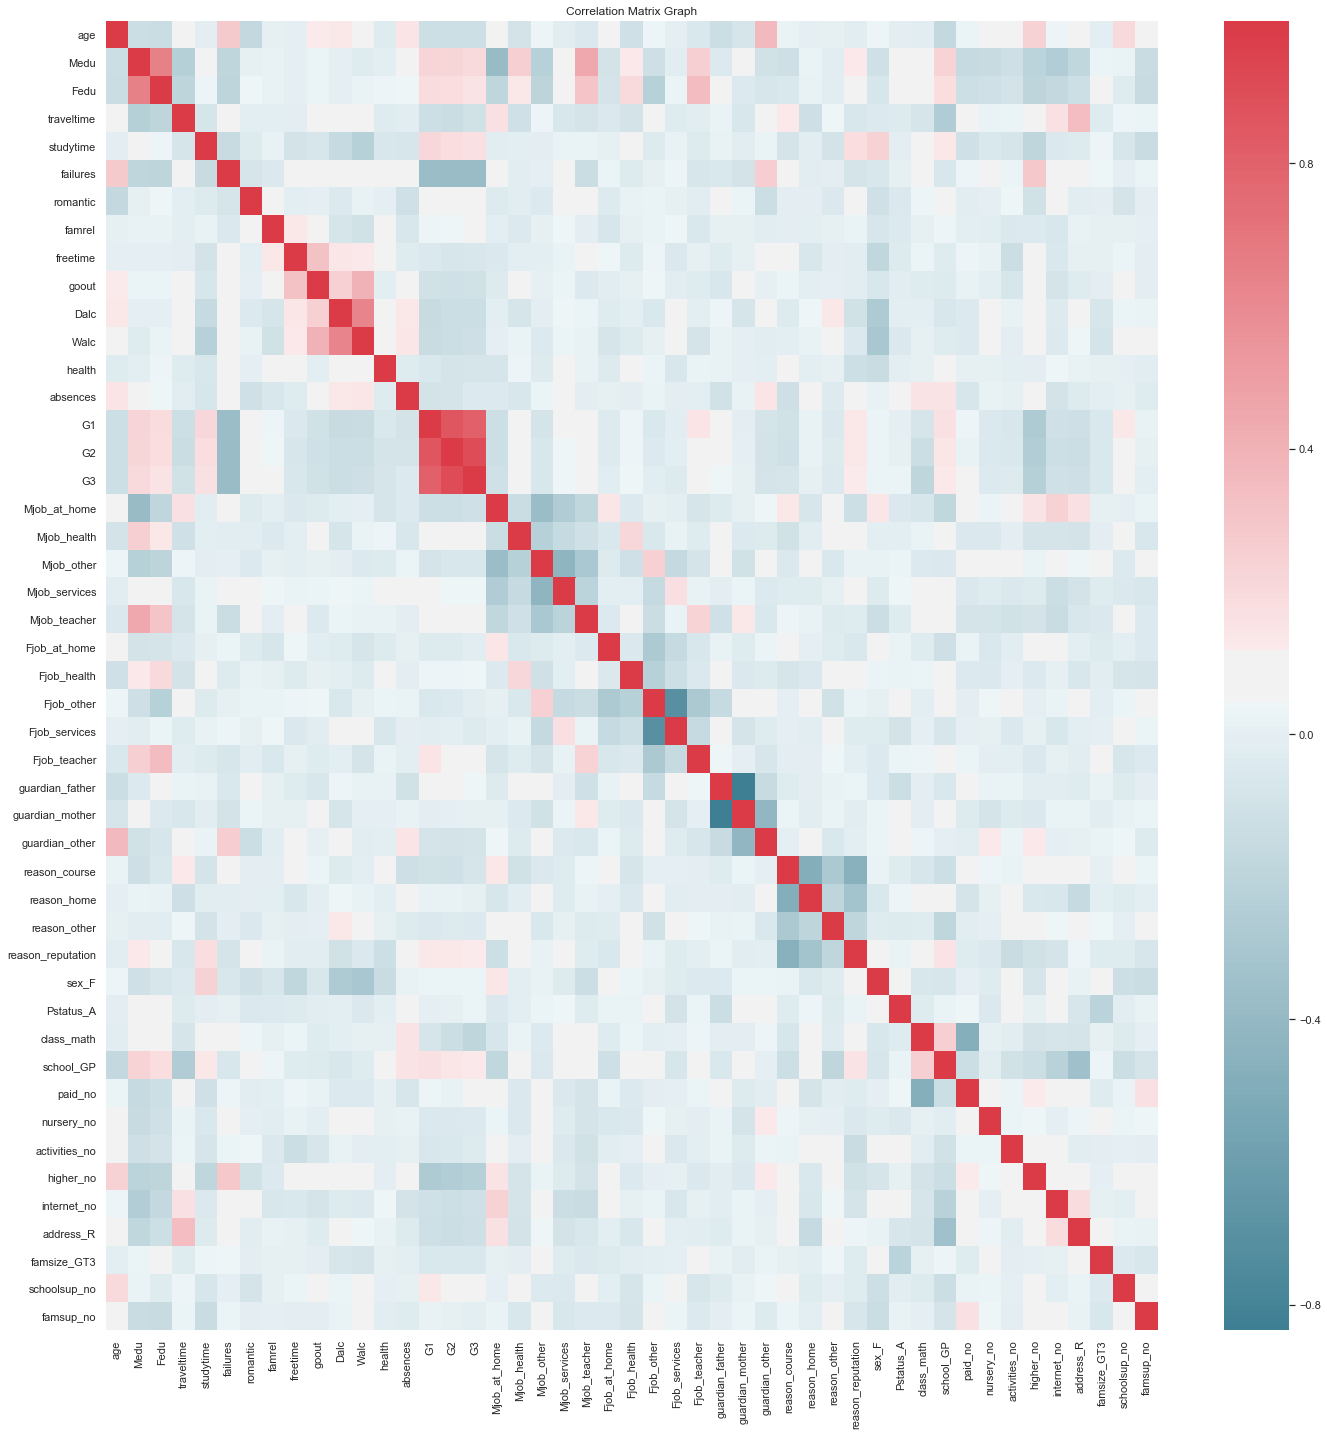

In [16]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(df_numeric.corr(), cmap=cmap, annot=False)

f.tight_layout()
plt.title('Correlation Matrix Graph')

The massive correlation matrix above shows the relationship of each and every feature to each other. This additionally includes nominal data that has been altered to either a one hot encoded or binary encoded to really grasp every relationship. 

Some observations are grades, G1, G2, G3 being very highly correlated to eachother, but also we have parents who are more likely to marry if they have matching levels of education, students are more likely to perform better in school if their parents are well educated, kids less likely to have internet and a short commute if they live in a rural environment, and the obvious higher amounts of study time are more likely to yield better grades.

However, returning to Alcohol consumption, we find that students are more apt to drink if they have a good family relationship at home, a lot of freetime, and if they go out often. This makes sense, especially in an environment such as Portugal where the legal drinking age is 16. A student is much more likely to have a social beer with their mom or dad if they get along with them. Lastly we see that absences tend to rise when a student drinks more often. I mean... yea... of course. Hang overs suck.  

Text(0.5, 1.0, 'Correlation Matrix Graph')

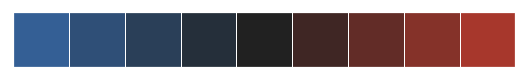

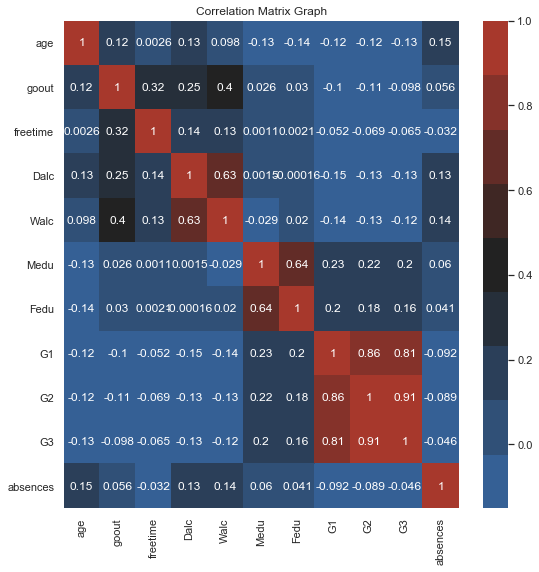

In [27]:
sns.palplot(sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark"))

df2 = df[['age','goout', 'freetime','Dalc','Walc', 'Medu', 'Fedu', 'G1', 'G2', 'G3', 'absences']]
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark")

f, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df2.corr(), cmap=cmap, annot=True)

f.tight_layout()
plt.title('Correlation Matrix Graph')

To make the previous correlation matrix more observable, here are some of the features we wanted to focus on.

Not mentioned before, we see that absences is negatively correlated with grades. A measurement that makes complete sense. While on the subject of grades, it's noticeable that freetime and going out don't really correlate with GPA. Unfortunately, this is a hard truth we've all come to terms with.

Lastly, and most importantly, we see that alcohol consumption is very negatively related to GPA. However, is this really because of abuse? It's most likely a result of the other negatively correlated factors such as going out, or having too much freetime. All of these indications suggest that these students should be hitting the books more often rather than seeking mental health experts.

## Exceptional Work (10 points total)
<em>
You have free reign to provide any additional analyses.
One idea (required for 7000 level students): implement dimensionality reduction using t-SNE, then visualize and interpret the results. Give an explanation of t-SNE dimensionality reduction methods.
</em>

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an algorithm for dimensionality reduction that is aimed at the visualization of high-dimensional datasets and spaces. The objective is to use distance approximation formulas, such as euclidean distance, to maintain the distance observed in a higher dimension to a lower dimensional representation.

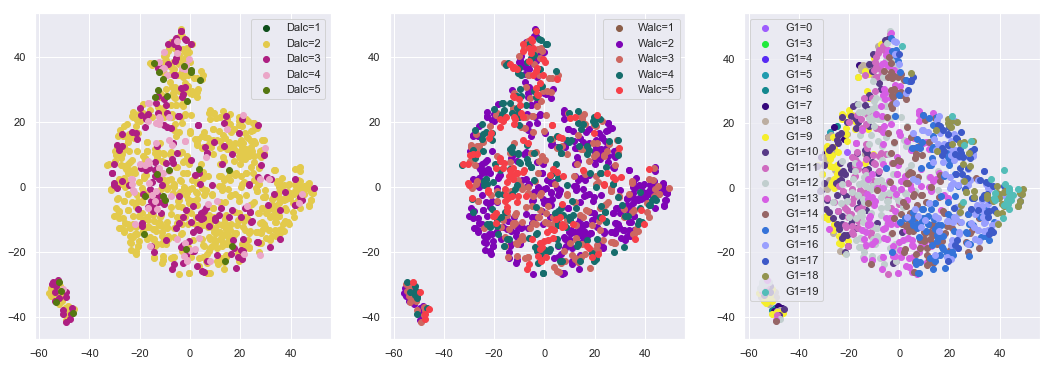

In [26]:
# The following code was generated with the help of http://scipy-lectures.org
def tse(data, feature):
    labels = df[feature].unique()
    labels.sort()
    labels = [ feature +'='+str(labels[i]) for i in range(len(labels))]
    target = data[feature]
    data = data.drop(['Dalc'], axis=1)

    tsne = TSNE(n_components=2, random_state=0)
    data_2D = tsne.fit_transform(data)
    target_ids = range(len(labels))
    
    colors = [ '#%02x%02x%02x' %  tuple(list(np.random.choice(range(256), size=3))) for c in range(len(labels))]

    for i, c, label in zip(target_ids, colors, labels):
        plt.scatter(data_2D[target == i, 0], data_2D[target == i, 1], c=c, label=label)

    plt.legend()

    
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1) 
tse(df_numeric, 'Dalc')
plt.subplot(1, 3, 2) 
tse(df_numeric, 'Walc')
plt.subplot(1, 3, 3) 
tse(df_numeric, 'G1')

The t-SNE graphs most notably show us that students who drink are really not similar to one another. Pretty much anyone may drink and for reasons that are unique case by case basis. 

However, in the graph on the far right, we see localizations of students given their GPA for the first period. Despite this dataset's focus on alcohol consumption, the real cultural and behavior trends and patters are mostly contributable and indicated by their grades, study habits, and ambition towards their education.